In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy
import scanpy.external as sce
import scanpy as sc
import anndata as ad
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy
import scanpy.external as sce
import scanpy as sc
import anndata as ad
import velocyto as vcy
import scvelo as scv
import pandas as pd

In [3]:
#modified is the normal gtf without the first two lines below
# stringtie --merge 60541_transcripts.gtf 60542_transcripts.gtf 60543_transcripts.gtf 60544_transcripts.gtf 60545_transcripts.gtf 60546_transcripts.gtf 60547_transcripts.gtf 60548_transcripts.gtf -o afran_genome_annotation_0.5.gtf -F 0 -T 0.5
# StringTie version 2.2.1
fran_gtf=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/1.stringtie/afran_genome_annotation_0.5_2_modified.gtf",sep="\t",header=None)
fran_gtf_2=fran_gtf[[0,2,3,8]]
fran_gtf_2=fran_gtf_2[fran_gtf_2[2]=='transcript']
fran_gtf_2['gene_id']=fran_gtf_2[8].str.split(';',expand=True)[0]
fran_gtf_2=fran_gtf_2[[0,2,3,'gene_id']].drop_duplicates(subset='gene_id', keep="first")
fran_gtf_2['gene_id']=fran_gtf_2['gene_id'].str[9:-1]
df=fran_gtf_2
def strata_normal(df2):
    df=df2.copy()
    df.loc[
      ((df[0]!='chr6')), 
      'strata'
    ] = 'Autosomal'
    df.loc[
      ((df[0]=='chr6')&(df[3]<=45665001)), 
      'strata'
    ] = 'pseudo'
    df.loc[
      ((df[0]=='chr6')&(((df[3] > 45665001.0) & (df[3] <= 48665001))))
    , 
      'strata'
    ] = 'S1'
    df.loc[
      #((merged_all_norm[0]=='chr6')&(((merged_all_norm[3] > 48665001.0) & (merged_all_norm[3] <= 61725001))))
      ((df[0]=='chr6')&(((df[3] > 48665001) & (df[3] <= 53325001))|((df[3] > 53585001) & (df[3] <= 54575001))|((df[3] > 54735001) & (df[3] <= 61725001))))
    , 
      'strata'
    ] = 'S0'
    df.loc[
      ((df[0]=='chr6')&(((df[3] > 61725001.0) & (df[3] <= 66725001))))
    , 
      'strata'
    ] = 'S2'
    df.loc[
      ((df[0].str.contains('W'))), 
      'strata'
    ] = 'W'
    return df
fran_gtf_2=strata_normal(fran_gtf_2)

In [4]:
artemia_plotting=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/data_integrated_harmony_DUBStepR_3_2.h5ad", chunk_size=6000)
features_AR=pd.DataFrame({'features': artemia_plotting.raw.var['_index']})
#artemia_2=ad.AnnData(artemia_plotting_1.raw.X,obs=artemia_plotting_1.obs,var=features_AR,obsm=artemia_plotting_1.obsm, uns=artemia_plotting_1.uns)
#artemia_2.obs.index
features_AR=features_AR.set_index(features_AR['features'])
features_AR.index.name = None
bdata=artemia_plotting
artemia_plotting = ad.AnnData(
    X=bdata.raw.X,
    var=features_AR,
    obs=bdata.obs,
    layers=bdata.layers,obsm=bdata.obsm,uns=bdata.uns
)
artemia_plotting.obs['seurat_clusters'] = artemia_plotting.obs['seurat_clusters'].astype('category') 

In [11]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_1 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/2.replicate_1/Afran_1/velocyto/Afran_1.loom',cache=True)
barcodes_replicate_1  = [bc.split(':')[1] for bc in velo_out_replicate_1.obs.index.tolist()]
barcodes_replicate_1  = [bc[0:len(bc)-1] + '-1' for bc in barcodes_replicate_1]
velo_out_replicate_1.obs.index = barcodes_replicate_1
#velo_out_replicate_1.var_names_make_unique()
#scv.utils.clean_obs_names(velo_out_replicate_1)
merged_adata_replicate_1=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_1")],velo_out_replicate_1)
#velo_out_replicate_2 =velo_out_replicate_2[velo_out_replicate_2.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [14]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_2 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/3.replicate_2/Afran_2/velocyto/Afran_2.loom',cache=True)
barcodes_replicate_2  = [bc.split(':')[1] for bc in velo_out_replicate_2.obs.index.tolist()]
barcodes_replicate_2  = [bc[0:len(bc)-1] + '-1' for bc in barcodes_replicate_2]
velo_out_replicate_2.obs.index = barcodes_replicate_2 
#velo_out_replicate_2.var_names_make_unique()
#scv.utils.clean_obs_names(velo_out_replicate_2)
merged_adata_replicate_2=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")],velo_out_replicate_2)
#velo_out_replicate_2 =velo_out_replicate_2[velo_out_replicate_2.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [15]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_3 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
barcodes_replicate_3  = [bc.split(':')[1] for bc in velo_out_replicate_3.obs.index.tolist()]
barcodes_replicate_3  = [bc[0:len(bc)] + '-1' for bc in barcodes_replicate_3]
velo_out_replicate_3.obs.index = barcodes_replicate_3
#velo_out_replicate_3.var_names_make_unique()
#scv.utils.clean_obs_names(velo_out_replicate_3)
merged_adata_replicate_3=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_3")],velo_out_replicate_3)
#velo_out_replicate_3 =velo_out_replicate_3[velo_out_replicate_3.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_3")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [16]:
#velo_out = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/4.replicate_3/Afran_ATAC/outs/velocyto/gex_possorted_bam_1AVCX.loom', cache=True)
velo_out_replicate_4 = scv.read('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/5.replicate_4/Afran_ATAC2/outs/velocyto/gex_possorted_bam_BRQJI.loom', cache=True)
barcodes_replicate_4  = [bc.split(':')[1] for bc in velo_out_replicate_4.obs.index.tolist()]
barcodes_replicate_4  = [bc[0:len(bc)] + '-1' for bc in barcodes_replicate_4]
velo_out_replicate_4.obs.index = barcodes_replicate_4
#velo_out_replicate_4.var_names_make_unique()
#scv.utils.clean_obs_names(velo_out_replicate_4)
merged_adata_replicate_4=scv.utils.merge(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_4")],velo_out_replicate_4)
#velo_out_replicate_3 =velo_out_replicate_3[velo_out_replicate_3.obs.index.isin(artemia_plotting[(artemia_plotting.obs.replicates == "replicate_3")].obs.index)]
#velo_out.obs.isin[artemia_plotting[(artemia_plotting.obs.replicates == "replicate_2")].obs.index.tolist()]

In [17]:
merged_adata_GEX=merged_adata_replicate_1.concatenate(merged_adata_replicate_2)#,merged_adata_replicate_3,merged_adata_replicate_4)
merged_adata_multiome=merged_adata_replicate_3.concatenate(merged_adata_replicate_4)#,merged_adata_replicate_3,merged_adata_replicate_4)

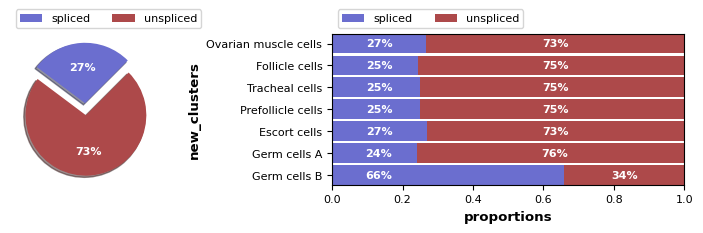

In [18]:
#rename_clusters
old_to_new = {
    0:'Tracheal cells',
    1:'Germ cells A',
    2:'Ovarian muscle cells',3:'Escort cells',4:'Follicle cells',5:'Prefollicle cells',6:'Germ cells B'}
merged_adata_GEX.obs['new_clusters'] = (
    merged_adata_GEX.obs['seurat_clusters']
    .map(old_to_new)
    .astype('category')
)
merged_adata_GEX.obs['new_clusters'] = merged_adata_GEX.obs['new_clusters'].cat.reorder_categories(['Ovarian muscle cells', 'Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B'])
scv.pl.proportions(merged_adata_GEX, groupby='new_clusters')
#sc.pl.umap(merged_adata, color='seurat_clusters', frameon=False, legend_loc='on data', title='', save='_celltypes.pdf')
#, save='/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/figures/figures_celltypes.pdf')

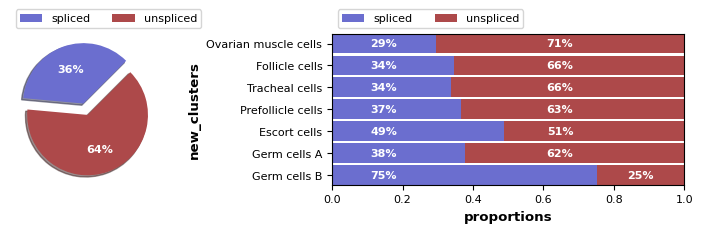

In [19]:
merged_adata_multiome.obs['new_clusters'] = (
    merged_adata_multiome.obs['seurat_clusters']
    .map(old_to_new)
    .astype('category')
)
merged_adata_multiome.obs['new_clusters'] = merged_adata_multiome.obs['new_clusters'].cat.reorder_categories(['Ovarian muscle cells', 'Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B'])
scv.pl.proportions(merged_adata_multiome, groupby='new_clusters')
#sc.pl.umap(merged_adata, color='seurat_clusters', frameon=False, legend_loc='on data', title='', save='_celltypes.pdf')
#, save='/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/figures/figures_celltypes.pdf')